In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import argparse
import cv2
import os
from collections import OrderedDict
from sklearn.preprocessing import LabelBinarizer

# Data Preprocessing

In [2]:
folders = []

In [3]:
path = 'Data/EnglishImg/English/Img/GoodImg/Bmp'

In [4]:
for root, dirnames, filenames in os.walk(path):
    for j in dirnames:
        folders.append(j)

In [5]:
len(folders)

62

In [6]:
files = {}

In [7]:
# Soring the files in ascending order of names
for i in folders:
    files[i]=os.listdir("Data/EnglishImg/English/Img/GoodImg/Bmp/"+i)

In [8]:
dict1 = OrderedDict(sorted(files.items()))

In [9]:
dict1.keys()

odict_keys(['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062'])

In [10]:
dict1['Sample001']

['img001-00001.png',
 'img001-00002.png',
 'img001-00003.png',
 'img001-00004.png',
 'img001-00005.png',
 'img001-00006.png',
 'img001-00007.png',
 'img001-00008.png',
 'img001-00009.png',
 'img001-00010.png',
 'img001-00011.png',
 'img001-00012.png',
 'img001-00013.png',
 'img001-00014.png',
 'img001-00015.png',
 'img001-00016.png',
 'img001-00017.png',
 'img001-00018.png',
 'img001-00019.png',
 'img001-00020.png',
 'img001-00021.png',
 'img001-00022.png',
 'img001-00023.png',
 'img001-00024.png',
 'img001-00025.png',
 'img001-00026.png',
 'img001-00027.png',
 'img001-00028.png',
 'img001-00029.png',
 'img001-00030.png',
 'img001-00031.png',
 'img001-00032.png',
 'img001-00033.png',
 'img001-00034.png',
 'img001-00035.png',
 'img001-00036.png',
 'img001-00037.png',
 'img001-00038.png',
 'img001-00039.png',
 'img001-00040.png',
 'img001-00041.png',
 'img001-00042.png',
 'img001-00043.png',
 'img001-00044.png',
 'img001-00045.png',
 'img001-00046.png',
 'img001-00047.png',
 'img001-0004

In [11]:
f = open("labels.txt", "a")
for i in dict1.keys():
    for j in dict1[i]:
        f.write("English/Img/GoodImg"+i+"/"+j+"\n")
f.close()        

In [12]:
l="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"


## Creating labels and data 

In [13]:
data = []
labels=[]
tmp=0

In [14]:
img = cv2.imread('Data/EnglishImg/English/Img/GoodImg/Bmp/Sample041/img041-00190.png')

In [15]:
img.shape

(62, 43, 3)

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Converting images to 28x28 

In [17]:
def conTO28x28(path):
    
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)   

    # convert each image of shape (32, 28, 1)
    w, h = img.shape
    if h > 28 or w > 28:
        
        (tH, tW) = img.shape
        dX = int(max(0, 28 - tW) / 2.0)
        dY = int(max(0, 28 - tH) / 2.0)

        img = cv2.copyMakeBorder(img, top=dY, bottom=dY,
              left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
              value=(0, 0, 0))
        img = cv2.resize(img, (28, 28))

    w, h = img.shape

    if w < 28:
        add_zeros = np.ones((28-w, h))*255
        img = np.concatenate((img, add_zeros))

    if h < 28:
        add_zeros = np.ones((28, 28-h))*255
        img = np.concatenate((img, add_zeros), axis=1)
    return img

In [18]:
image = conTO28x28('Data/EnglishImg/English/Img/GoodImg/Bmp/Sample001/img001-00001.png')

In [19]:
image.shape

(28, 28)

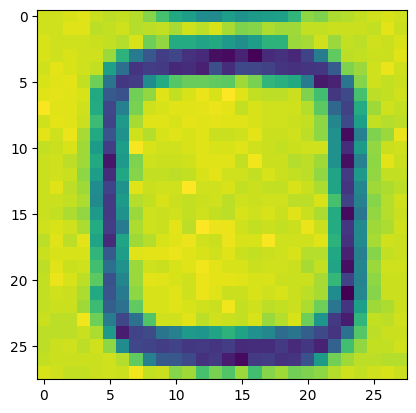

In [20]:
plt.imshow(image)

# Giving Labels to images

In [21]:
for i in dict1.keys():
    for j in dict1[i]:
        labels.append(tmp)
        image = conTO28x28("Data/EnglishImg/English/Img/GoodImg/Bmp/"+i+"/"+j)
        data.append(image)
    tmp+=1

In [22]:
from numpy import save

In [23]:
len(labels)

7705

In [24]:
labels = np.array(labels, dtype="int")
data = np.array(data, dtype='float32')

In [25]:
tmp

62

In [26]:
labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [27]:
save('data.npy', data)
save('labels.npy', labels)

In [28]:
tmp_data = np.load('data.npy')

In [29]:
tmp_data.shape

(7705, 28, 28)

# Combining Mnist and A-Z datasets 

In [30]:
def load_az_dataset(datasetPath):
    data = []
    labels = []
    for row in open(datasetPath):
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        image = image.reshape((28,28))
        data.append(image)
        labels.append(label)
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    return (data, labels)

In [31]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
(azData, azLabels) = load_az_dataset("Data/A_Z Handwritten Data.csv")

In [32]:
azData.shape

(372451, 28, 28)

# Stacking up the training set and test set of mnist

In [33]:
mnist_data = np.vstack([trainData, testData])
mnist_labels = np.hstack([trainLabels, testLabels])

In [34]:
mnist_data[0].shape

(28, 28)

In [35]:
labels.shape

(7705,)

In [36]:
azLabels+=10

# Combining all the three datasets

In [37]:
labels1=np.hstack([mnist_labels, labels, azLabels])
data1=np.vstack([mnist_data, data, azData])

In [38]:
labels1.shape

(450156,)

In [39]:
data1.shape

(450156, 28, 28)

# Saving the combined dataset into .npy

In [40]:
save("Data/combined_data.npy", data1)
save("Data/combined_labels.npy", labels1)

In [41]:
loaded_data = np.load('Data/combined_data.npy')
loaded_labels = np.load('Data/combined_labels.npy')

In [42]:
loaded_data.shape

(450156, 28, 28)

In [43]:
loaded_labels.shape

(450156,)

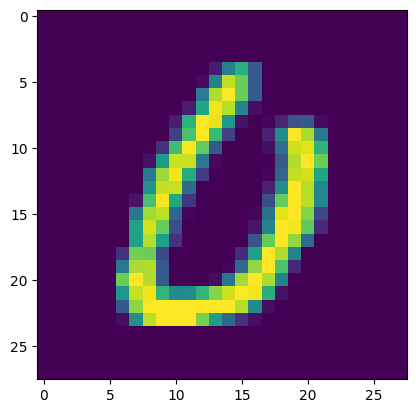

In [44]:
plt.imshow(loaded_data[-50000])

In [45]:
tmp_img = cv2.resize(loaded_data[0], (32, 32))

In [46]:
tmp_img.shape

(32, 32)

In [47]:
data = [cv2.resize(image, (32,32)) for image in loaded_data]
data = np.array(data, dtype='float32')

In [48]:
data.shape

(450156, 32, 32)

In [49]:
data2 = np.expand_dims(data, axis=-1)

In [50]:
data2.shape

(450156, 32, 32, 1)

In [51]:
le = LabelBinarizer()
labels = le.fit_transform(loaded_labels)
counts = labels.sum(axis=0)

In [52]:
labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Calculating class weights in dataset

In [53]:
classTotals = labels.sum(axis=0)
classWeight = {}

for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [54]:
classWeight

{0: 8.305793378995434,
 1: 7.316113624937154,
 2: 8.244617563739377,
 3: 8.094423585036852,
 4: 8.471401542715762,
 5: 9.127646228634154,
 6: 8.387175792507204,
 7: 7.929028742678109,
 8: 8.488697681201693,
 9: 8.324799771167047,
 10: 4.034308289437205,
 11: 6.6272344301491515,
 12: 2.463892651540806,
 13: 5.637481840193705,
 14: 4.897105838801952,
 15: 46.86553945249597,
 16: 9.857239627434378,
 17: 7.85413574416408,
 18: 40.933192686357245,
 19: 6.791948658109685,
 20: 10.22071992976295,
 21: 4.932378611982036,
 22: 4.662154585502603,
 23: 3.004542404377226,
 24: 1.0,
 25: 2.984974358974359,
 26: 9.955019668205917,
 27: 4.868841488916771,
 28: 1.1937203912963228,
 29: 2.5521550401192616,
 30: 2.000240549828179,
 31: 13.644397562119082,
 32: 5.364206063957239,
 33: 9.163570528967254,
 34: 5.327384221123925,
 35: 9.493883542652096,
 36: 368.3987341772152,
 37: 1531.7631578947369,
 38: 923.9206349206349,
 39: 1265.3695652173913,
 40: 256.4185022026432,
 41: 1573.162162162162,
 42: 1616.

# Performing data augmentation

In [55]:
(trainX, testX, trainY, testY) = train_test_split(data2,
	labels, test_size=0.25, stratify=labels, random_state=42)

In [56]:
aug = ImageDataGenerator(
    rotation_range = 10,
    zoom_range=0.05,
    width_shift_range=0.1,
    shear_range=0.15,
    height_shift_range=0.1,
    fill_mode="nearest"
)

# Building Resnet Model

In [57]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, BatchNormalization, Activation, Conv2D, AveragePooling2D, Flatten, Dense
from keras.layers import add
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [58]:
def residual_module(data, K, stride, chanDim, red=False,
                    reg=0.0001, bnEps=2e-5, bnMom=0.9):
    shortcut = data

    bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                             momentum=bnMom)(data)
    act1 = Activation("relu")(bn1)
    conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
                   kernel_regularizer=l2(reg))(act1)

    bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                             momentum=bnMom)(conv1)
    act2 = Activation("relu")(bn2)
    conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
                   padding="same", use_bias=False,
                   kernel_regularizer=l2(reg))(act2)

    bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                             momentum=bnMom)(conv2)
    act3 = Activation("relu")(bn3)
    conv3 = Conv2D(K, (1, 1), use_bias=False,
                   kernel_regularizer=l2(reg))(act3)

    if red:
        shortcut = Conv2D(K, (1, 1), strides=stride,
                           use_bias=False, kernel_regularizer=l2(reg))(act1)

    x = add([conv3, shortcut])
    return x


In [62]:
def build_resnet(inputShape, classes, stages, filters,
                 reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
    chanDim = -1
    if tf.keras.backend.image_data_format() == "channels_first":
        inputShape = (inputShape[2], inputShape[0], inputShape[1])
        chanDim = 1

    inputs = Input(shape=inputShape)
    x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                           momentum=bnMom)(inputs)

    if dataset == "cifar":
        x = Conv2D(filters[0], (3, 3), use_bias=False,
                   padding="same", kernel_regularizer=l2(reg))(x)
    elif dataset == "tiny_imagenet":
        x = Conv2D(filters[0], (5, 5), use_bias=False,
                   padding="same", kernel_regularizer=l2(reg))(x)
        x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                               momentum=bnMom)(x)
        x = Activation("relu")(x)
        x = AveragePooling2D((3, 3), strides=(2, 2))(x)

    for i in range(0, len(stages)):
        stride = (1, 1) if i == 0 else (2, 2)
        x = residual_module(x, filters[i + 1], stride,
                            chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

        for j in range(0, stages[i] - 1):
            x = residual_module(x, filters[i + 1],
                                (1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

    x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                           momentum=bnMom)(x)
    x = Activation("relu")(x)
    x = AveragePooling2D((8, 8))(x)
    x = Flatten()(x)
    x = Dense(classes, kernel_regularizer=l2(reg))(x)
    x = Activation("softmax")(x)

    model = Model(inputs, x, name="resnet")
    return model


In [63]:
def train_resnet_model(model, trainX, trainY, testX, testY, classWeight, EPOCHS, INIT_LR, BS, checkpoint_path):
    print("[INFO] compiling model...")
    opt = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    checkpoint_dir = os.path.dirname(checkpoint_path)

    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)

    aug = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.05,
        width_shift_range=0.1,
        shear_range=0.15,
        height_shift_range=0.1,
        fill_mode="nearest"
    )

    H = model.fit(
        aug.flow(trainX, trainY, batch_size=BS),
        validation_data=(testX, testY),
        steps_per_epoch=len(trainX) // BS,
        epochs=EPOCHS,
        class_weight=classWeight,
        verbose=1,
        callbacks=[cp_callback]
    )

    model.save("models/RESNET_OCR", save_format='.h5')


In [64]:
inputShape = (32, 32, 1)  
classes =  len(le.classes_) # Number of classes 
stages = [3, 3, 3] 
filters = [64, 64, 128, 256]  
model = build_resnet(inputShape, classes, stages, filters)

checkpoint_path = "../models"

In [65]:
train_resnet_model(model, trainX, trainY, testX, testY, classWeight, EPOCHS=25, INIT_LR = 1e-1, BS=256, checkpoint_path = "../models")
print("Model Saved in models/RESNET_OCR")

[INFO] compiling model...
Epoch 1/25
 103/1318 [=>............................] - ETA: 4:00 - loss: 47.9825 - accuracy: 0.0259

KeyboardInterrupt: 